In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k, Wien
from scipy.optimize import curve_fit
import pint # For unit handling (because I am lazy😭)
plt.style.use(["science", "notebook", "grid"])
U = pint.UnitRegistry() 
import sys

# Print versions
print(f"Python version: {sys.version[:7]}")
print("Numpy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("SciPy version:", np.__version__)
print("Pint version:", pint.__version__)

Python version: 3.11.2 
Numpy version: 1.24.2
Matplotlib version: 3.7.0
SciPy version: 1.24.2
Pint version: 0.20.1


The `Pint` library is not a very common library to use. The more famous `astropy` library is more famous and can do this so-called unit handling quite elegantly as well. However, the `Pint` library is very small and I had it pre-loaded on my machine because of some previous work.  
Also, I am too lazy and impatient to install the `astropy` library on my machine or do unit handling manually. 🥲

---
# Question 1

---

**(a) Derivations**  
(Too much work to do by hand 😭. Please forgive my bad LaTeX skills.)

---
### Planck's Black Body Radiation
---

Planck's black body radiation equation is given by:

$$B(\nu, T)=\frac{2h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{kT}}-1}$$

To convert this equation from frequency $\nu$ to wavelength $\lambda$, we can use the relation:

$$\lambda=\frac{c}{\nu}$$

Substituting this into the original equation, we get:

$$B(\lambda, T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$$

Therefore, the Planck's black body radiation equation in terms of wavelength is:

$$B(\lambda, T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$$

---
### Rayleigh-Jeans Black Body Radiation
---

The Rayleigh-Jeans black body radiation equation in frequency is given as:

\begin{equation*}
B_\nu(\nu,T) = \frac{2\nu^2kT}{c^2}
\end{equation*}

To convert this equation from frequency to wavelength, we can use the relation:

\begin{equation*}
\nu = \frac{c}{\lambda}
\end{equation*}

Substituting this relation into the Rayleigh-Jeans black body radiation equation, we get:

\begin{equation*}
B_\lambda(\lambda,T) = \frac{2ckT}{\lambda^4}
\end{equation*}

where $B_\lambda(\lambda,T)$ is the Rayleigh-Jeans black body radiation as a function of wavelength.

The Rayleigh-Jeans black body radiation equation in wavelength is:

\begin{equation*}
B_\lambda(\lambda,T) = \frac{2ckT}{\lambda^4}
\end{equation*}


---
### Wien's law of black body radiation
---
The Wien's law of black body radiation equation in frequency is given as:

\begin{equation*}
B_\nu(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{kT}}}
\end{equation*}

To convert this equation from frequency to wavelength, we can use the relation:

\begin{equation*}
\nu = \frac{c}{\lambda}
\end{equation*}

Substituting this relation into the Rayleigh-Jeans black body radiation equation, we get:

\begin{equation*}
B_\lambda(\lambda,T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda kT}}}
\end{equation*}


---
### Wien's Displacement Law
---
The Wien's Displation Law equation in frequency is given as:

\begin{equation*}
\lambda_{max} = \frac{b}{T}
\end{equation*}

where $\lambda_{max}$ is the wavelength of maximum intensity of the black body radiation and $b$ is a constant.


In [105]:
# I am defining the necessary black body radiations here first because 
# these will be needed throught the assignment later.

def Plank_law(wavelength:np.ndarray, T:float) -> np.ndarray:
    """ Plank's law
    Args:
        wavelength (np.ndarray): wavelength in m
        T (float): temperature in K
    Returns:
        np.ndarray: spectral radiance in W/m^2/sr/m"""
    exp_factor = (h * c / (wavelength * k * T)) 
    return (2 * h * c**2 / wavelength**5) * np.exp(-exp_factor) / (1 - np.exp(-exp_factor))

def wienslaw(wavelength:np.ndarray, T:float) -> np.ndarray:
    """ Wiens' law 
    Args:
        wavelength (np.ndarray): wavelength in m
        T (float): temperature in K
    Returns:
        np.ndarray: spectral radiance in W/m^2/sr/m"""
    pre_factor = 2 * h * c**2 / wavelength**5
    exp_factor = np.exp(-h * c / (wavelength * k * T))
    return pre_factor * exp_factor

def RayLeighJeansLaw(wavelength:np.ndarray, T:float) -> np.ndarray:
    """ Rayleigh-Jeans' law
    Args:
        wavelength (np.ndarray): wavelength in m
        T (float): temperature in K
    Returns:
        np.ndarray: spectral radiance in W/m^2/sr/m"""
    return 2 * c * k * T / wavelength**4

def WienDisplacementLaw(T:float) -> np.ndarray:  
    """ Wien's displacement law
    Args:
        wavelength (np.ndarray): wavelength in m
        T (float): temperature in K
    Returns:
        np.ndarray: Wave length in m"""
    return Wien / T


# Define wavelength range and temperature
wavelength : np.ndarray = np.logspace(-9, 1, 10000) # m
T :float = 5000 # K

---
**(b) Plotting**

Plot the Planck’s function $B\lambda (\lambda ,T)$, in a log-log plot (use the command `loglog(lambda,Blambda))`, as a function of wavelength ($\lambda$) ranging from 1 nm to 1 m (use 10000 log-spaced data points) at a given temperature, T= 5000 K. Plot the Wien’s law and the Rayleigh-Jeans law superposed on the Planck function to show their discrepancies at large and small wavelengths respectively. Set the range of the y-axis as $10^{−10}$ to $10^{20}$.

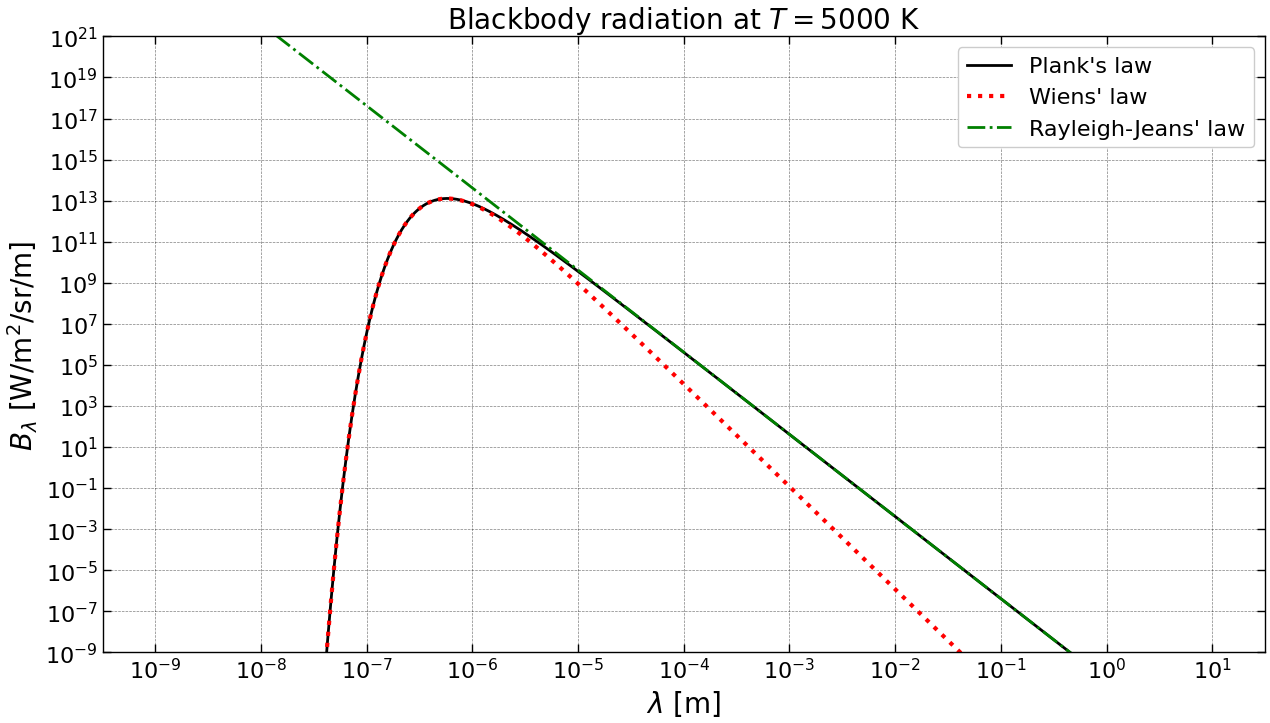

In [106]:
plt.figure(figsize=(15, 8))

# Set Limits
plt.ylim(10e-10, 10e20)

# Plot Plank's law, rayleigh-jeans' law and wiens' law
plt.loglog(wavelength, Plank_law(wavelength, T), 'k-', label="Plank's law",
           alpha=1);
plt.loglog(wavelength, wienslaw(wavelength, T), 'r:', label="Wiens' law",
           lw = 3);
plt.loglog(wavelength, RayLeighJeansLaw(wavelength, T), 'g-.',
           label="Rayleigh-Jeans' law");

# Set axis labels, titles and decorators in latex
plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title(r"Blackbody radiation at $T = 5000$ K", fontsize=20);
plt.locator_params(axis="both", numticks=20);

# Set legend
plt.legend();

---
**(c) Peak Finding**  
Observe from your plot the wavelength at which $B_\lambda$ peaks? Use the function `max` in Python `max(B)` on the array of $B_\lambda$ created in the earlier exercise to find the peak of the spectrum. Find the corresponding wavelength, $\lambda_{max}$. Indicate with a point marker the peak value on the plot, using the command `loglog(lambda_max,Bmax,’ro’,ms=10)`. Include the details of the point marker in the legend of the plot. You could choose to adjust the font size by including `plt.legend(fontsize=20)` in the code.

In [107]:
intensity = Plank_law(wavelength, T)
max_wavelength = wavelength[np.argmax(intensity)] 

**Comment:** Another neat method to find the peak in a signal
(I learnt this in my dissertation work 😅)

In [108]:
# First we calculate the dydx(slope) of the signal
dydx = np.gradient(intensity, wavelength)

# Then we multiply adjacent elements of the slopes to find the sign changes
sign_changes = dydx[1:] * dydx[:-1]

# Wherever the slope changes is less than zero, we have a local extremum
# Then we index the wavelength array with this index to find the wavelength 
# of the local extremum
max_wavelength_other_method = wavelength[1:][sign_changes < 0][0]

# Check if the two methods give the same result
print("Wavelength of maximum intensity with first method(in metre): ", max_wavelength)
print("Wavelength of maximum intensity with second method(in metre): ", max_wavelength_other_method)

print(f"Do the 2 methods give the same result? {max_wavelength == max_wavelength_other_method}")

Wavelength of maximum intensity with first method(in metre):  5.797974856117092e-07
Wavelength of maximum intensity with second method(in metre):  5.797974856117092e-07
Do the 2 methods give the same result? True


**Adding the point to the code**

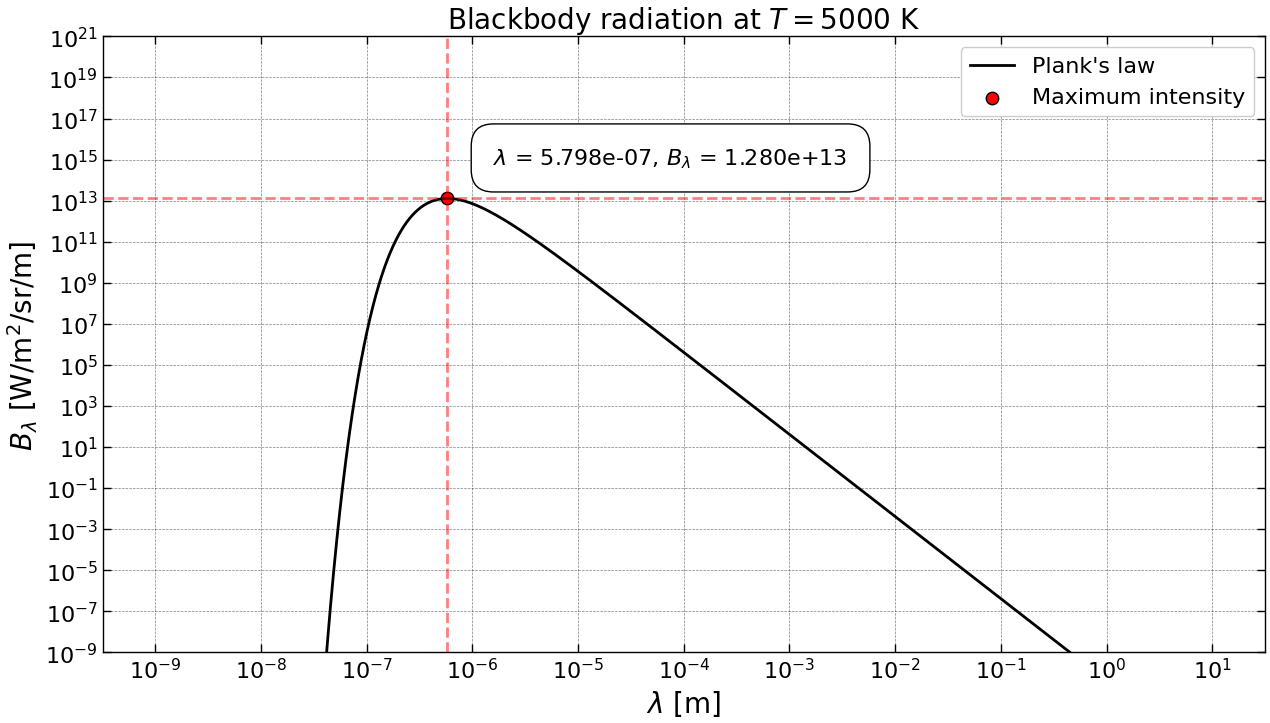

In [109]:
plt.figure(figsize=(15, 8))
# Set Limits
plt.ylim(10e-10, 10e20)

# Plot Plank's law, rayleigh-jeans' law and wiens' law
plt.loglog(wavelength, Plank_law(wavelength, T), 'k-', label="Plank's law",
           alpha=1);


# Set axis labels, titles and decorators in latex
plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title(r"Blackbody radiation at $T = 5000$ K", fontsize=20);
plt.locator_params(axis="both", numticks=20);

# Adding the maximum wavelength with a text box describing it
plt.text(max_wavelength+1e-6, 6*10e13, 
         rf"$\lambda$ = {max_wavelength:.3e}, $B_\lambda$ = {Plank_law(max_wavelength, T):.3e}", 
         fontsize=16,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.scatter(max_wavelength, Plank_law(max_wavelength, T), marker='o', color='r', s=80,
            label="Maximum intensity", edgecolor = "k");


# Join the point with the axis
plt.axvline(max_wavelength, color='r', linestyle='--', alpha=0.5);
plt.axhline(Plank_law(max_wavelength, T), color='r', linestyle='--', alpha=0.5);

# Set legend
plt.legend();

---
**(d)Color finding**  
What colour does the peak wavelength correspond to? Does it match with your calculation from the well-known Wien’s displacement law?

In [113]:
# Get color from wavelength
# Doing this because as a  coding enthusiast, it is my hobby to waste 30 minutes to design a 
# function instead of just googling for the temperature 🫠
def wavelength_to_rgb(wavelength:float, gamma:float=0.8) -> tuple:
    """ Convert wavelength to RGB color
    Args:
        wavelength (float): wavelength in nm
        gamma (float, optional): gamma value. Defaults to 0.8.
    Returns:
        tuple: RGB color
    """
    wavelength = float(wavelength) * 1e9
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R)/255, int(G)/255, int(B)/255) # Returns in decimal format

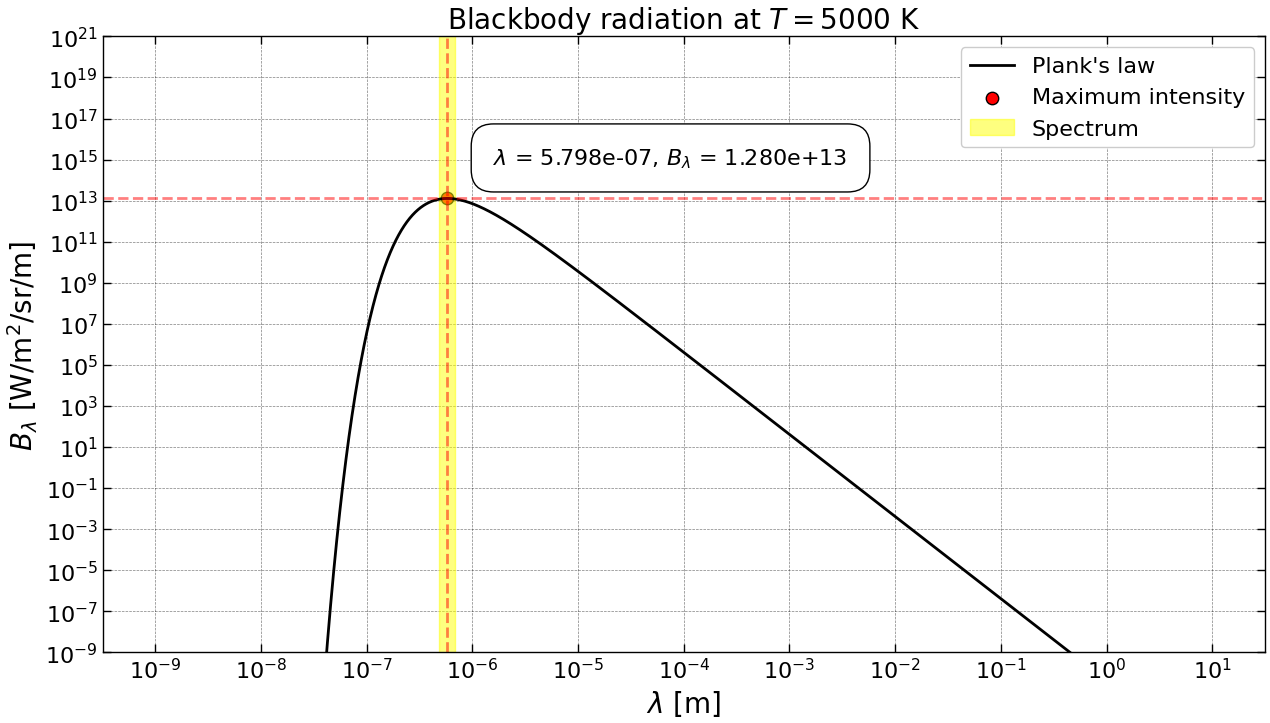

In [114]:
plt.figure(figsize=(15, 8))

# Set Limits
plt.ylim(10e-10, 10e20)

# Plot Plank's law, rayleigh-qjeans' law and wiens' law
plt.loglog(wavelength, Plank_law(wavelength, T), 'k-', label="Plank's law",
           alpha=1);


# Set axis labels, titles and decorators in latex
plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title(r"Blackbody radiation at $T = 5000$ K", fontsize=20);
plt.locator_params(axis="both", numticks=20);

# Adding the maximum wavelength with a text box describing it
plt.text(max_wavelength+1e-6, 6*10e13, 
         rf"$\lambda$ = {max_wavelength:.3e}, $B_\lambda$ = {Plank_law(max_wavelength, T):.3e}", 
         fontsize=16,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.scatter(max_wavelength, Plank_law(max_wavelength, T), marker='o', color='r', s=80,
            label="Maximum intensity", edgecolor = "k");

# Get Color of maximum wavelength
color = wavelength_to_rgb(max_wavelength)  # (0.9921875, 0.99609375, 0.0)

# Plot the spectrum
plt.fill_between([max_wavelength-1e-7, max_wavelength+1e-7], [10e21, 10e21], color=color, alpha=0.5,
                    label="Spectrum")


# Join the point with the axis
plt.axvline(max_wavelength, color='r', linestyle='--', alpha=0.5);
plt.axhline(Plank_law(max_wavelength, T), color='r', linestyle='--', alpha=0.5);

# Set legend
plt.legend();

---
**(e)**

Plot $B_\lambda$ as a function of wavelength $\lambda$ (0.001 nm ≤ $\lambda$ ≤ 10 m) in a log-log plot (generate 10000 logarithmically spaced data points for each of the curves), for various temperatures ranging from 1 K ≤ T ≤ $10^8$ K, incrementing in factors of 10. Set the lower limit of the y-axis to 1010. A snippet of the code to be used for plotting is given below:

```python
loglog(lmb,Blmb) 
ylim(bottom=(1,e−10))
xlim ( [ ( 1 . e −12) ,10.])
```

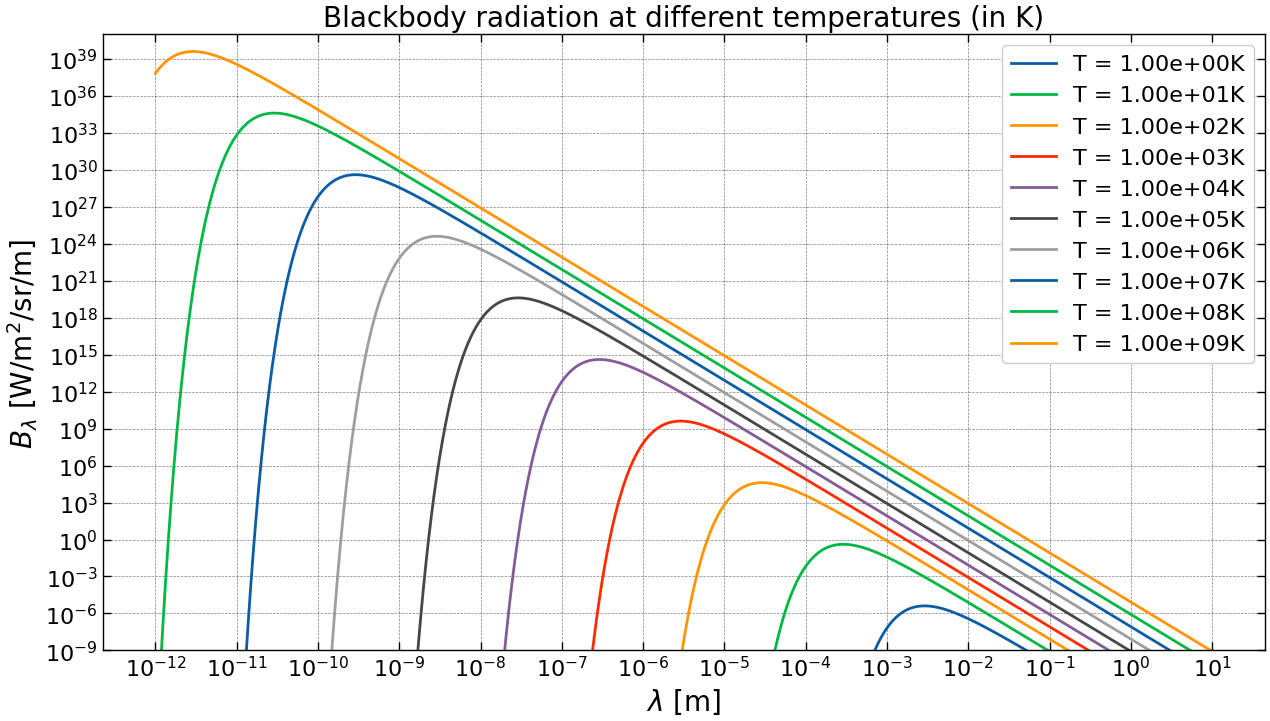

In [116]:
wavelength : np.ndarray = np.logspace(-12, 1, 10000) # Wavelength in meters
Temp : np.ndarray = np.logspace(0, 9, 10) # Temperature in Kelvin

plt.figure(figsize=(15, 8))

# Set Limits
plt.ylim(10e-10, 10e40)

for temp in Temp:
    plt.loglog(wavelength, Plank_law(wavelength, temp), label=f"T = {temp:.2e}K")

# Set decorations
plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title("Blackbody radiation at different temperatures (in K)", fontsize=20);
plt.locator_params(axis="both", numticks=20);

# Set legend
plt.legend();

---
**(f)**  
Using the Wien’s displacement law, generate an array of the wavelengths, λmax, at which the spectral radiance peaks for each of the Planck curves at different temperatures (1 K ≤ T ≤ $10^8$ K), plotted in the earlier question. Use the Planck function to generate an array of the corresponding spectral radiances, $B\lambda (\lambda_{max} ,T)$, for each of these wavelengths at the different temperatures. Plot this data-set of $B\lambda (\lambda_{max} ,T)$ with $\lambda_{max}$, superposed on the earlier generated plot of the Planck curves. Observe and comment on the nature of this curve

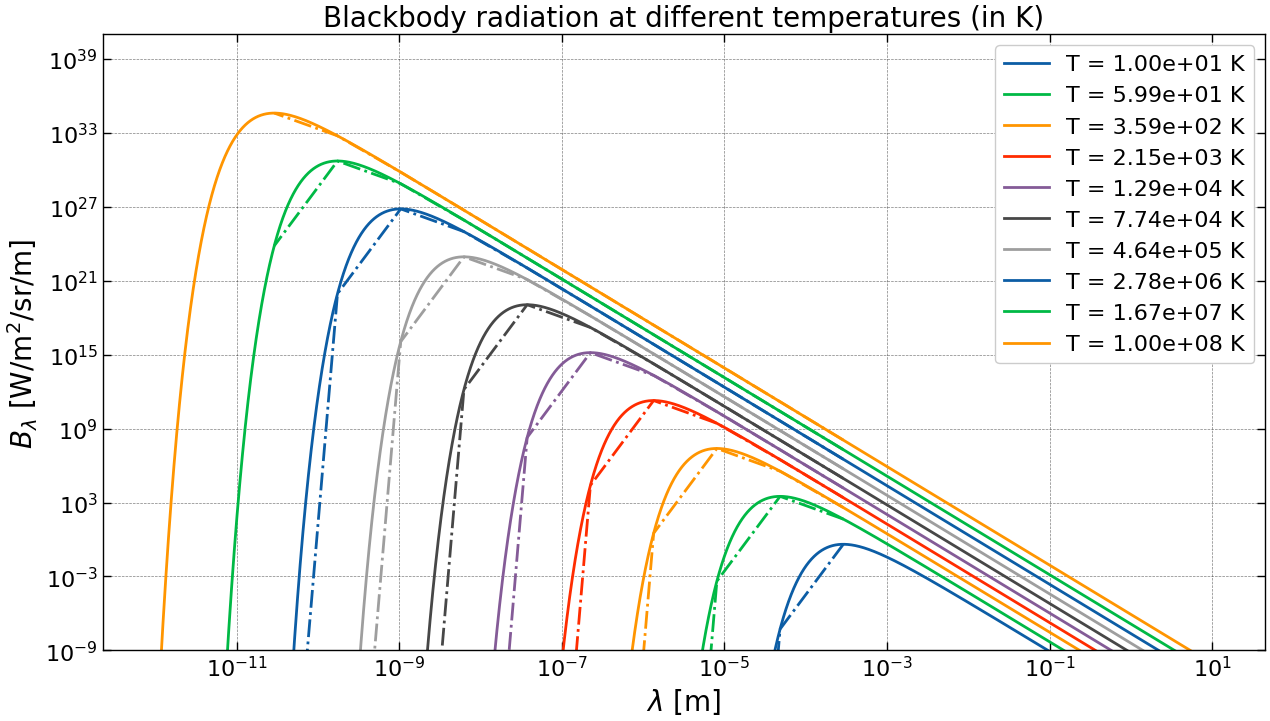

In [119]:
plt.figure(figsize=(15, 8))
temps : np.ndarray = np.logspace(1, 8, 10)
max_wavelengths : np.ndarray = WienDisplacementLaw(temps)

spectral_radiances : np.ndarray = np.zeros((len(max_wavelengths), len(temps)))


# This is a very bad double loop and should be avoided
# But works well and looks nice
# This can be done in a single operation using native numpy arrays
for wav_idx, max_wav in enumerate(max_wavelengths):
    for temp_idx, temp in enumerate(temps):
        spectral_radiances[wav_idx, temp_idx] = Plank_law(max_wav, temp)

for temp_idx, temp in enumerate(temps):
    plt.loglog(max_wavelengths, 
               spectral_radiances[:, temp_idx],  "-.",
               color = f"C{temp_idx}")
    plt.loglog(wavelength, Plank_law(wavelength, temp), label=f"T = {temp:.2e} K")

# Set limits
plt.ylim(10e-10, 10e40)

    
plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title("Blackbody radiation at different temperatures (in K)", fontsize=20);

plt.legend()

--- 
**(g)**  
Generate a log-log plot for the Rayleigh-Jeans law, superposed on the Planck spectrum for low temperature (1 K) and high temperature ($10^4$ K) for the wavelength range 10 nm to 10 m. Set the range of the y-axis between $10^{−19}$ to $10^{20}$. Compare the two Rayleigh-Jeans curves with the Planck curves and observe the severity of the ultraviolet catastrophe for low temperature.

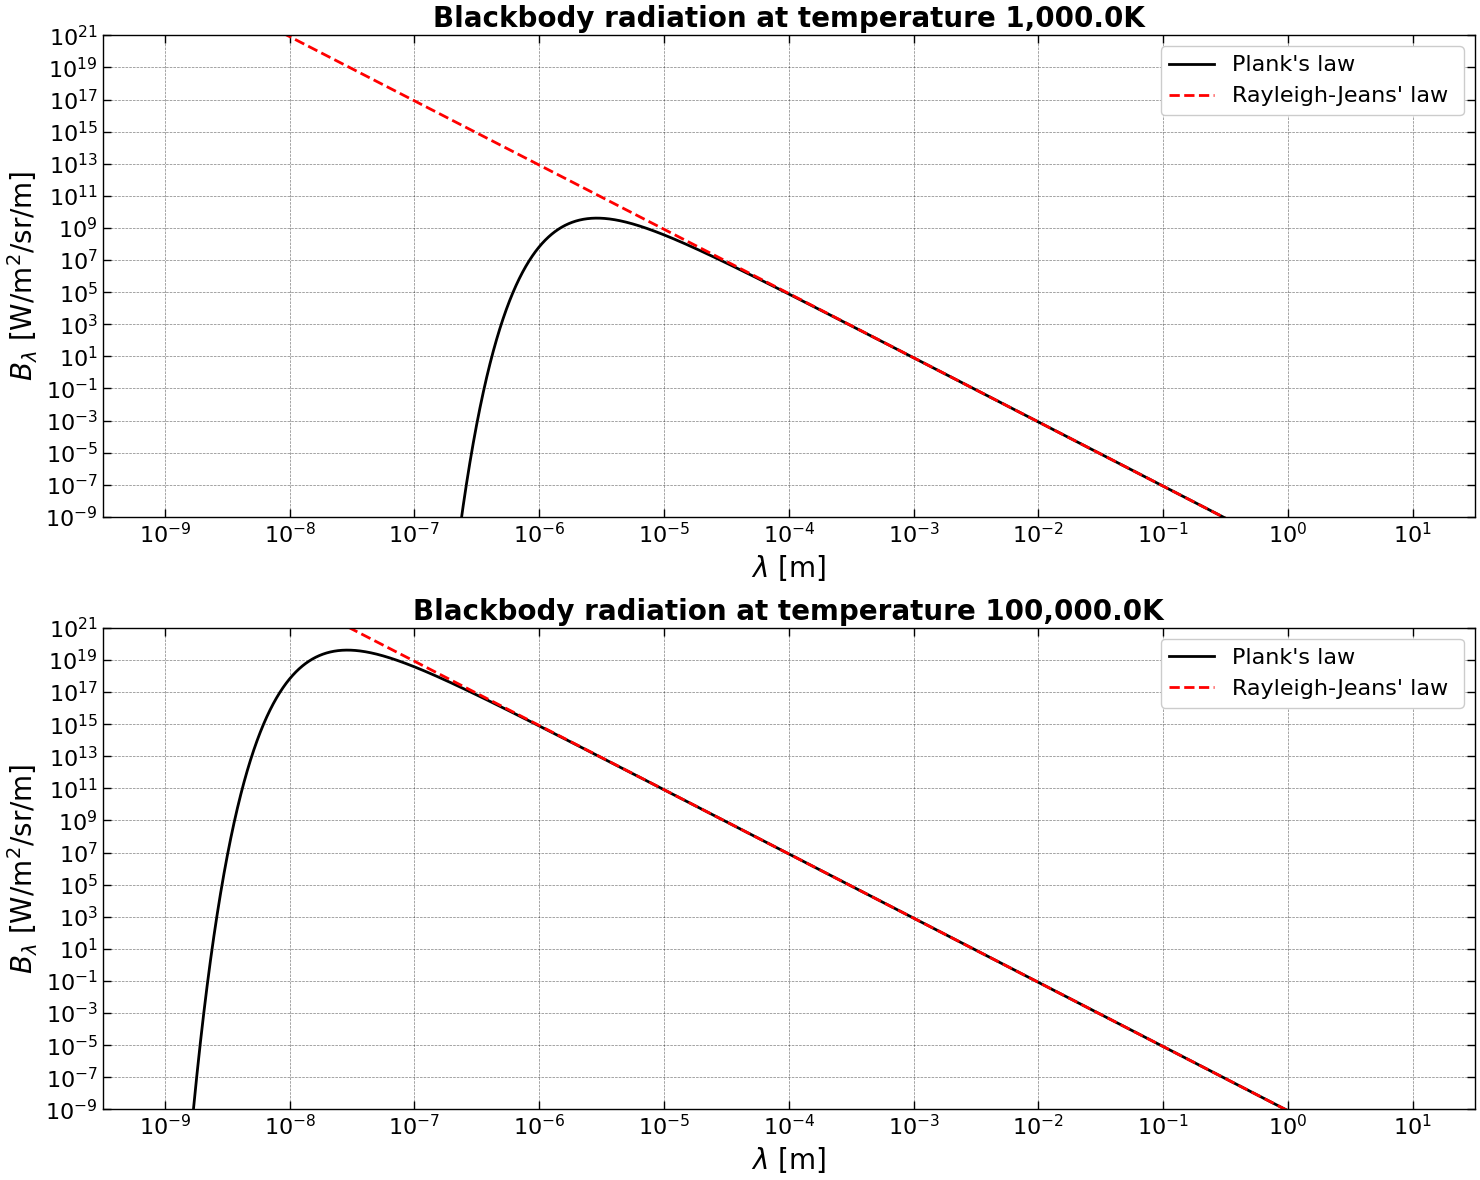

In [121]:
wavelengths : np.ndarray = np.logspace(-9, 1, 10000)
temperatures : np.ndarray = np.array([1000, 10e4])

fig, ax = plt.subplots(2, 1, figsize = (15, 12))
ax = ax.ravel()

for idx, temp in enumerate(temperatures):
        ax[idx].loglog(wavelengths, Plank_law(wavelengths, temp), 'k',
                       label=f"Plank's law ")
        ax[idx].loglog(wavelengths, RayLeighJeansLaw(wavelengths, temp), 'r--',
                       label=f"Rayleigh-Jeans' law ")
        ax[idx].set_title(f"Blackbody radiation at temperature {temp:,}K",
                          fontsize=20, fontweight="bold")
        ax[idx].set_ylim(10e-10, 10e20)
        ax[idx].set_xlabel(r"$\lambda$ [m]", fontsize=20)
        ax[idx].set_ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20)
        ax[idx].locator_params(axis="both", numticks=20)
        ax[idx].legend()

plt.tight_layout()

---
**(h)**   
  Integrate the Planck function $B\lambda (\lambda, T )$ over all wavelengths numerically for T = 100 K, $10^4$ K and $10^8$ K, using integration tools available in Scipy. Does your result match with the theoretical result? Use proper scalings and transformation of variables for the integration.

In [122]:
from scipy.integrate import quad

In [123]:
# I am breaking up the problem into subparts for easier computation
# Forst I am calculating the iRiemann Integral and then multiplying it with the constants required.

def RiemannIntegral(x:float) -> float:
    """Riemann integral for spectral integration
    Args:
        x (float): Wavelength
    Returns:
        float: Riemann integral"""
    return x**3 * np.exp(-x) / (1 - np.exp(-x))

def SpectralIntegration(xlim:float, T:float) -> float:
    """Spectral integration
    Args:
        xlim (float): Wavelength limit
        T (float): Temperature
    Returns:
        float: Spectral integration"""
    constant =  k**4 * T**4 / (c**2 * h**3)
    integral, error = quad(RiemannIntegral, 0, xlim)
    return constant * integral, error

temps : np.ndarray = np.array([100, 1e4, 1e8])
xlim : float = np.inf

for temp in temps:
    integral, error = SpectralIntegration(xlim, temp)
    print(f"Integral for T = {temp:.2e} K is {integral:.2e} +- {error:.2e}")

Integral for T = 1.00e+02 K is 9.02e-01 +- 2.63e-09
Integral for T = 1.00e+04 K is 9.02e+07 +- 2.63e-09
Integral for T = 1.00e+08 K is 9.02e+23 +- 2.63e-09


---
**(i)**  
What do you observe about the peak of the Planck curves, as the temperature is increased? Is it in acccordance with the Wien’s displacement law?

In [124]:
temps_range = np.logspace(0, 9, 10) # K
wavelength : np.ndarray = np.logspace(-12, 1, 10000) # m

intensities : np.ndarray = np.array([Plank_law(wavelength, temp) for temp in temps_range])
max_wavelengths : np.ndarray = np.array([wavelength[np.argmax(intensity)] for intensity in intensities])

# Calculate the maximum wavelength for each temperature using Wien's displacement law
Wiens_wavelenths : np.ndarray = WienDisplacementLaw(temps_range)

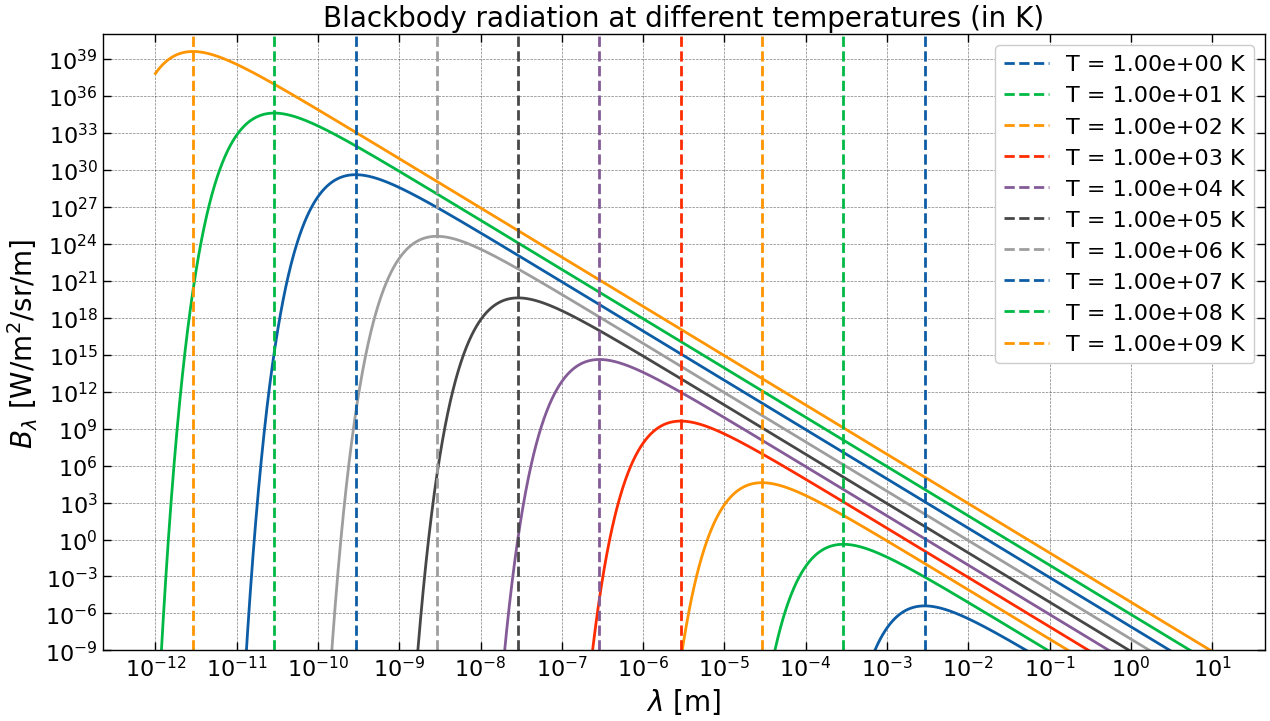

In [125]:
plt.figure(figsize=(15, 8))
plt.ylim(10e-10, 10e40)

for idx, intenity in enumerate(intensities):
    plt.loglog(wavelength, intenity, alpha=1, color=f"C{idx}") 

for idx, max_wavelength in enumerate(Wiens_wavelenths):
    plt.axvline(max_wavelength, color=f"C{idx}", linestyle='--', alpha=1, 
                label=f"T = {temps_range[idx]:.2e} K");

plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title("Blackbody radiation at different temperatures (in K)", fontsize=20);
plt.locator_params(axis="both", numticks=20);

plt.legend();

---
## Question 2

---

Generating a dataset from the spectral radiance (Bλ) relation and fitting it:
(a) Generate a dataset using the Planck function $(B\lambda (\lambda,T))$ at a given temperature T (say, 5700 K), as a function of wavelength, ranging from 1 nm to 3000 nm (use 100 equi-spaced data points) with random errors. Random errors should be drawn from the Gaussian distribution with zero mean and arbitrary standard deviation.
(b) Now, using the curve fitting tool in scipy.optimize, fit the above generated data to find the best fit temperature (T). Comment on how well this temperature matches with the temperature used to generate the data-set.
(c) Plot the data along with the fitted curve.

In [126]:
# Constant
np.random.seed(100)
N_points : int = 100
temperature: float = 5700.0 # Kelvin
wavelength = np.linspace(1e-9, 3000*1e-9, 100)  # in m

# calculate the intensity
mean : float = 0.0
std : float = 0.1
multiplicative_factor : float = 1e13 # This is to give some more randomness to the data

intensity : np.ndarray = Plank_law(wavelength, temperature) +\
        np.random.normal(mean, std, N_points) * multiplicative_factor

In [127]:
## Fitting the data

# Define the model
def fitting_func(x:np.ndarray, T:float) -> np.ndarray:
    """Fitting function
    Args:
        x (np.ndarray): Wavelength
        T (float): Temperature
    Returns:
        np.ndarray: Intensity"""
    return Plank_law(x, T)

# Fit the data
popt, pcov = curve_fit(fitting_func, wavelength, intensity, p0=5000)

print(f"Fitting Temperature = {popt[0]:.2f} +- {np.sqrt(pcov[0, 0]):.2f} K")

Fitting Temperature = 5705.88 +- 12.14 K


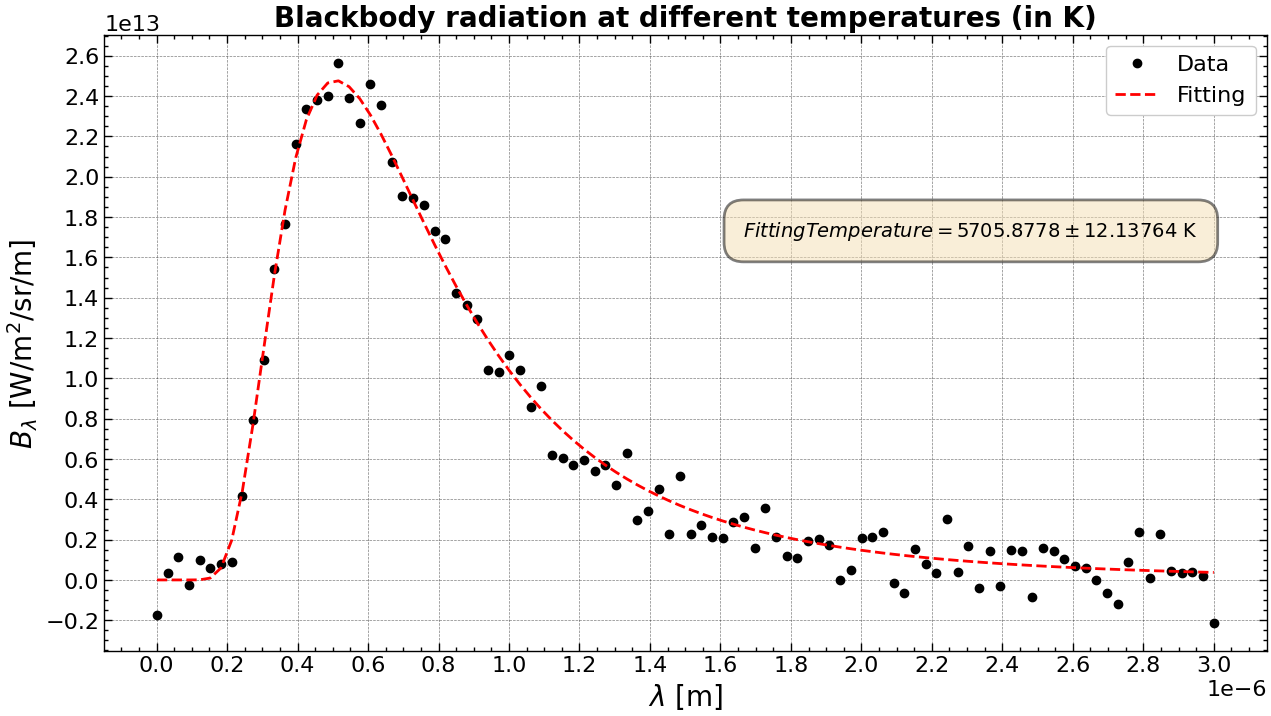

In [128]:
plt.figure(figsize=(15, 8))
plt.plot(wavelength, intensity, 'ko', label="Data")

plt.plot(wavelength, fitting_func(wavelength, popt[0]), 
         'r--', label="Fitting")

plt.xlabel(r"$\lambda$ [m]", fontsize=20);
plt.ylabel(r"$B_\lambda$ [W/m$^2$/sr/m]", fontsize=20);
plt.title("Blackbody radiation at different temperatures (in K)", fontsize=20, 
          fontweight = "bold");
plt.locator_params(axis="both", nbins=30);

# Put temperature in a text box
textstr = f"$Fitting Temperature = {popt[0]:.4f} \pm {np.sqrt(pcov[0, 0]):.5f} $ K"
props = dict(boxstyle='round, pad = 1', facecolor='wheat', alpha=0.5, 
             edgecolor='black', linewidth=2, 
             pad=0.5)
plt.text(0.55, 0.7, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.legend();

---
## Question 3: **Fitting the Cosmic Microwave Background**


---
The NASA Cosmic Background Explorer (COBE) satellite carried an instrument, FIRAS (Far-Infrared Absolute Spec- trophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory.

$$
I(\tilde{\nu}, T) = \frac{2h\tilde{\nu}^3}{c^2} \frac{1}{e^{\frac{h\tilde{\nu}}{k_B T}} - 1}

$$
where the radiation frequency is expressed in wavenumbers, $cm^{−1}$, and the speed of light, c, is taken to be in $cms^{−1}$. The data file `‘cmb-data.txt’` contains measurements of $I(\tilde{\nu})$ based on the FIRAS observations. Note that the units of $I(\tilde{ν})$ in this file are $erg s^{−1} cm^{−2} sr^{−1} cm$. Use `scipy.optimize.curve_fit` to determine the temperature of the CMB and take the estimated $1 - \sigma$ error in the measurement to be $2 × 10^{−6} erg s^{−1} cm^{−2} sr^{−1} cm$. Parts of the code is supplied below as pointers. Fill in the blank spaces to complete the code and generate the final result and the plot.

---

First, I am defining a function to fetch the data from the internet. THis is being done using the `requests` module. The function doesn't save any dat aon my local machine but just returns the data as a string. The data is then parsed using the `numpy` module as a text file and is read using the `loadtxt` function. The data is parsed using the same function and is returned as 2 separate array for `x_data` and `y_data.`  
The link to the website is given below:
https://scipython.com/static/media/problems/P8.extras/cmb-data.txt

In [129]:
import requests
# Doing this to scrape the data from the web, because though I may be lazy, I like coding and hence
# can waste 20 minutes to rather write a useless piece of code to do web scraping than
# to download the actual data in 2 minutes

In [130]:
def load_data_from_url(url:str) -> np.ndarray:
    """Load data from url
    Args:
        url (str): Url of the data
    Returns:
        np.ndarray: Data"""
    response = requests.get(url) # Get the data from the url
    x_data, y_data = np.loadtxt(response.text.splitlines(), unpack = True)
    return x_data, y_data

# Get the data 

url = "https://scipython.com/static/media/problems/P8.extras/cmb-data.txt"
x_data, y_data = load_data_from_url(url)

I am using a module called `pint` to handle units and convert them from SI system to cgs system. The module is imported as `u` and is used to convert the units. The units are converted using the `to` function. The units are converted from `m` to `cm` and from `K` to `K`.  
I am doing this mainly because I am too lazy and dumb to do this manually. 😅


In [132]:
## Change units of data from SI to cgs

# SI Units
h_si = h * (U.J * U.s) # J s
c_si = c * (U.m / U.s) # m/s
k_si = k * (U.J / U.K) # J/K

# CGS Units
h_cgs = h_si.to(U.erg * U.s) # erg s
c_cgs = c_si.to(U.cm / U.s) # cm/s
k_cgs = k_si.to(U.erg / U.K) # erg/K

In [133]:
# Intensity model for the CMB

def Intensity(wave_no:np.ndarray, T:float):
    """Intensity function
    Args:
        wave_no (float): Wavenumber in cm-1
        T (float): Temperature in K
    Returns:
        float: Intensity"""
    
    exp_factor : float = h_cgs.magnitude * c_cgs.magnitude * wave_no / (k_cgs.magnitude * T)   
    numerator : float = 2 * h_cgs.magnitude * c_cgs.magnitude**2 * wave_no**3 * np.exp(- exp_factor)
    denominator : float = 1 - np.exp(- exp_factor)
    return numerator / denominator

In [134]:
## Fitting the data
sd : float = 2 * 10 ** (-6) # In CGS
sigma : np.ndarray = np.full(len(x_data), sd) # Same as using np.ones * factor
p0 : float = 2.7 # Initial guess
popt, pcov = curve_fit(Intensity, x_data, y_data)
x_fit_data : np.ndarray = np.linspace(x_data[0]-1, x_data[-1], 10000) # For plotting

print(f"Temperature of the CMB from fitting = {popt[0]:.4f} +- {np.sqrt(pcov[0, 0])} K")

Temperature of the CMB from fitting = 2.7147 +- 0.004053534998152385 K


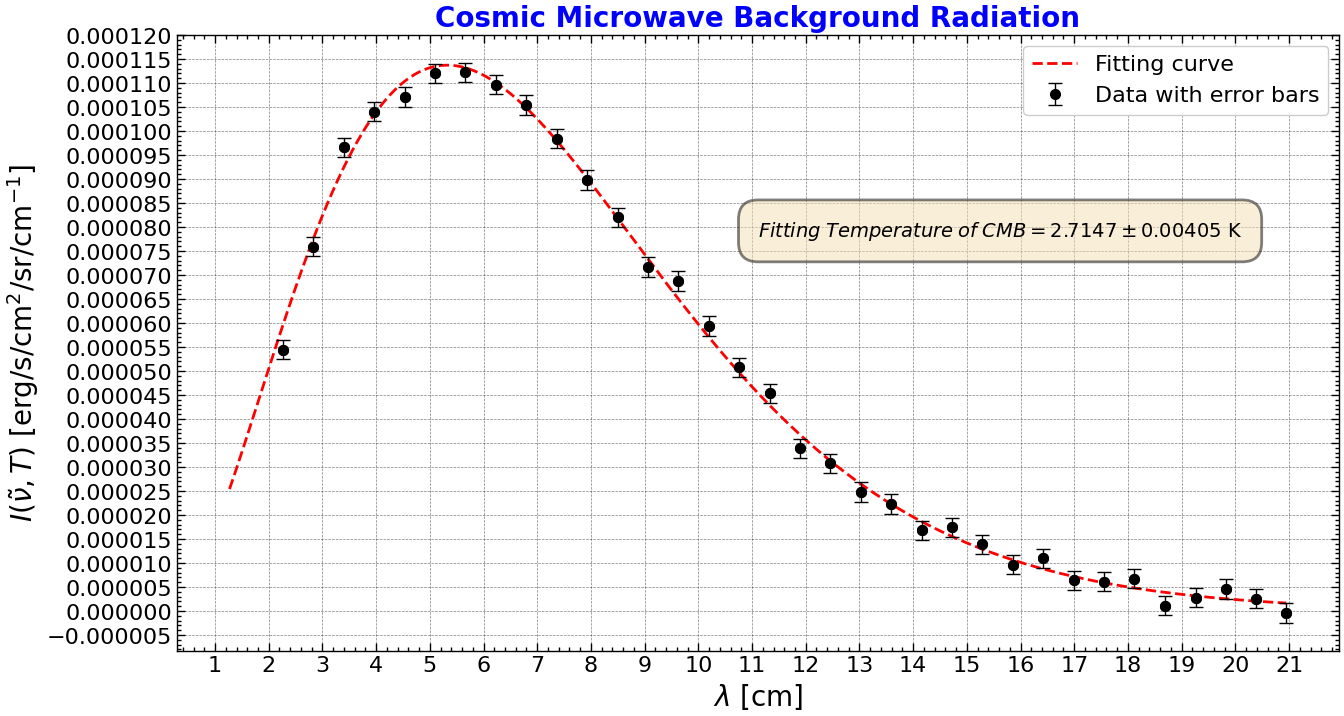

In [135]:
## Plot the data

plt.figure(figsize=(15, 8))
plt.plot(x_data, y_data, 'ko', 
            markersize=7)

plt.plot(x_fit_data, Intensity(x_fit_data, popt[0]),
            'r--', label="Fitting curve")

plt.xlabel(r"$\lambda$ [cm]", fontsize=20);
plt.ylabel(r"$ I(\tilde{\nu}, T) $ [erg/s/cm$^2$/sr/cm$^{-1}$]", fontsize=20);

# Putting temperature in a text box
textstr = rf"$Fitting \;Temperature \;of \;CMB = {popt[0]:.4f} \pm {np.sqrt(pcov[0, 0]):.5f} $ K"
props = dict(boxstyle='round, pad = 1', facecolor='wheat', alpha=0.5,
                edgecolor='black', linewidth=2,
                pad=0.5)
plt.text(0.5, 0.7, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title("Cosmic Microwave Background Radiation", fontsize=20, 
          fontweight="bold", color="blue")

# Plotting the error bars
plt.errorbar(x_data, y_data, yerr=sigma, fmt='ko', label="Data with error bars",
                markersize=7, capsize=5, capthick=1, elinewidth=1)

plt.locator_params(axis="both", nbins=30);

plt.legend();